In [ ]:
# import torchvision
# import torch
# from torchvision import datasets, transforms

# data_train = datasets.MNIST(root = "../data/",
#                             transform = transforms,
#                             train = True,
#                             download = True)
# data_test = datasets.MNIST(root = "../data/",
#                            transform = transforms,
#                            train = False)

In [34]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
x1_train = x_train.reshape(60000, 784)
x1_test = x_test.reshape(10000, 784)

In [36]:
x = x1_train[0:120, 0:100]

In [37]:
from direpack import dicomo, ppdire
pppca = ppdire(projection_index = dicomo, pi_arguments = {'mode' : 'var'}, n_components=1, optimizer='SLSQP')
pppca.fit(x)

ppdire(pi_arguments={'mode': 'var'},
       projection_index=<class 'direpack.dicomo.dicomo.dicomo'>)

In [38]:
import numpy as np
res = np.dot(x, pppca.x_loadings_)
res

array([[   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [ -81.12393706],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [ -37.17698873],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [-214.17735471],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [ -70.01589638],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.   

In [42]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian',bandwidth=0.2).fit(res)

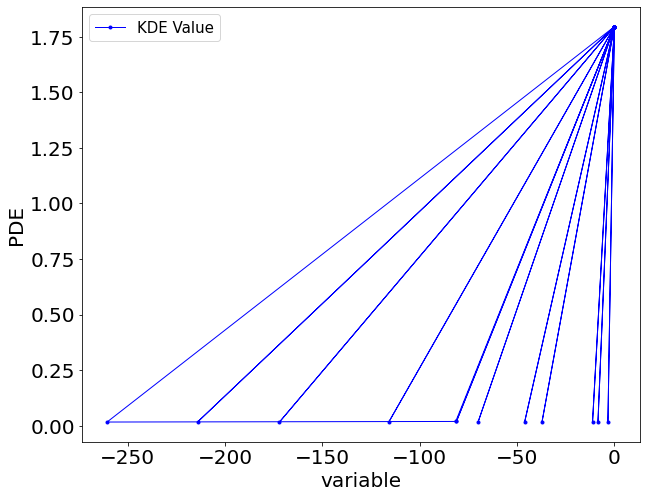

In [48]:
import matplotlib.pyplot as plt
log_dens = kde.score_samples(res)  # 返回的是点res对应概率密度的log值，需要使用exp求指数还原
plt.figure(figsize = (10, 8))  # 设置画布大小
plt.plot(res, np.exp(log_dens), marker='.', linewidth=1, c="b", label='KDE Value')
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小      
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('variable', font)
plt.ylabel('PDE', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()